In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt #visualisasi
from termcolor import colored as cl # text customization
import itertools # advanced tools
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN Algorithm
from sklearn.svm import SVC #SVM Algorithm
from sklearn.ensemble import RandomForestClassifier # Random Forest Tree Algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import joblib

In [2]:
df_train = pd.read_csv("data_train_after_smote.csv")
df_test = pd.read_csv("data_test.csv")
print("Fin")

Fin


In [3]:
df_train.shape

(440296, 30)

In [4]:
##Vérifier l’équilibre entre fraudes et normales
print(df_train['Class'].value_counts())

Class
0    220148
1    220148
Name: count, dtype: int64


In [5]:
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']

X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

In [6]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (440296, 29)
Number transactions y_train dataset:  (440296,)
Number transactions X_test dataset:  (55133, 29)
Number transactions y_test dataset:  (55133,)


In [7]:
#  Modèle Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)
print("Modele entrainé")

Modele entrainé


In [8]:
#  Prédictions
y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)[:, 1]

#  Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(dt,'decision_tree_model.joblib')
print("Modèle sauvegardé sous 'decision_tree_model.joblib'")


Confusion Matrix:
[[53390  1652]
 [   13    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     55042
           1       0.05      0.86      0.09        91

    accuracy                           0.97     55133
   macro avg       0.52      0.91      0.54     55133
weighted avg       1.00      0.97      0.98     55133

Modèle sauvegardé sous 'decision_tree_model.joblib'


In [9]:
#  Normalisation globale (important pour KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Modèle KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print("Modele entrainé")

Modele entrainé


In [10]:
#  Prédictions
y_pred = knn.predict(X_test_scaled)
y_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(knn,'KNN_model.joblib')
print("Modèle sauvegardé sous 'KNN_model.joblib'")


Confusion Matrix:
[[54878   164]
 [   23    68]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.29      0.75      0.42        91

    accuracy                           1.00     55133
   macro avg       0.65      0.87      0.71     55133
weighted avg       1.00      1.00      1.00     55133

Modèle sauvegardé sous 'KNN_model.joblib'


In [ ]:
# Normalisation (très important pour SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle SVM avec probabilités
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
print("Modele entrainé")

In [ ]:
#  Prédictions
y_pred = svm.predict(X_test_scaled)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

#  Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(svm,'SVM_model.joblib')
print("Modèle sauvegardé sous 'SVM_model.joblib'")


In [ ]:
#  Normalisation (nécessaire pour MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)
print("Modele entrainé")

In [ ]:
#  Prédictions
y_pred = mlp.predict(X_test_scaled)
y_proba = mlp.predict_proba(X_test_scaled)[:, 1]

#  Évaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(mlp,'MLP_model.joblib')
print("Modèle sauvegardé sous 'MLP_model.joblib'")


In [8]:
#  Entraîner le modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("Modele entrainé")

In [11]:
# Prédire sur les données test
y_pred = rf.predict(X_test)

#  Évaluer les performances
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

joblib.dump(rf, 'Random_Forest_model.joblib')
print("Modèle sauvegardé sous 'Random Forest_model.joblib'")


Confusion Matrix:
[[55028    14]
 [   19    72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.84      0.79      0.81        91

    accuracy                           1.00     55133
   macro avg       0.92      0.90      0.91     55133
weighted avg       1.00      1.00      1.00     55133



C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


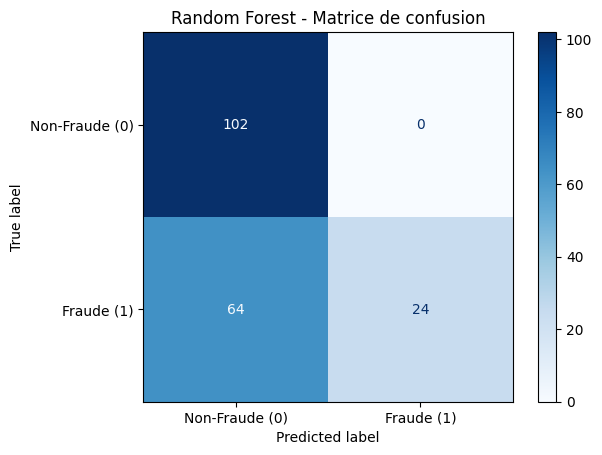

In [34]:
y_pred_rf = rf.predict(X_test)
rf_matrix = confusion_matrix(y_test, y_pred_rf)
# Affichage avec sklearn
disp = ConfusionMatrixDisplay(confusion_matrix=rf_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Matrice de confusion")
plt.savefig('rf_cm_plot.png')
plt.show()

C:\Users\karim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


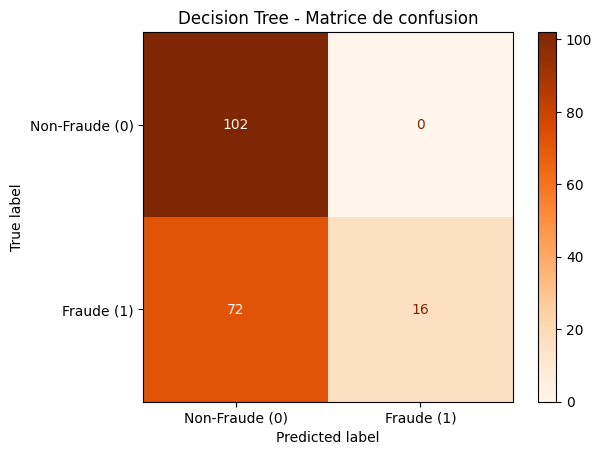

In [36]:
#  Prédictions sur le jeu test
y_pred_dt = dt.predict(X_test)

#  Matrice de confusion
dt_matrix = confusion_matrix(y_test, y_pred_dt)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=dt_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Decision Tree - Matrice de confusion")
plt.savefig('dt_cm_plot.png')
plt.show()

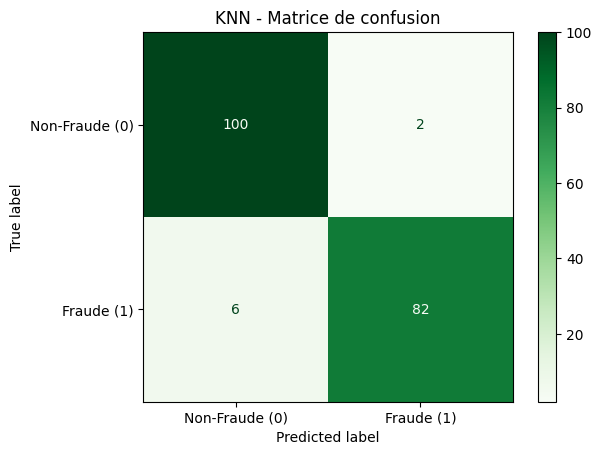

In [37]:
#  Prédictions
y_pred_knn = knn.predict(X_test_scaled)

#. Matrice de confusion
knn_matrix = confusion_matrix(y_test, y_pred_knn)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=knn_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Greens)
plt.title("KNN - Matrice de confusion")
plt.savefig('knn_cm_plot.png')
plt.show()

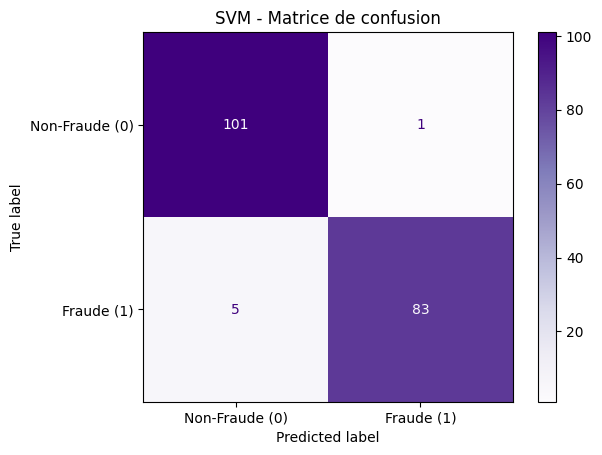

In [38]:
#  Prédictions
y_pred_svm = svm.predict(X_test_scaled)

#  Matrice de confusion
svm_matrix = confusion_matrix(y_test, y_pred_svm)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=svm_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Purples)
plt.title("SVM - Matrice de confusion")
plt.savefig('svm_cm_plot.png')
plt.show()

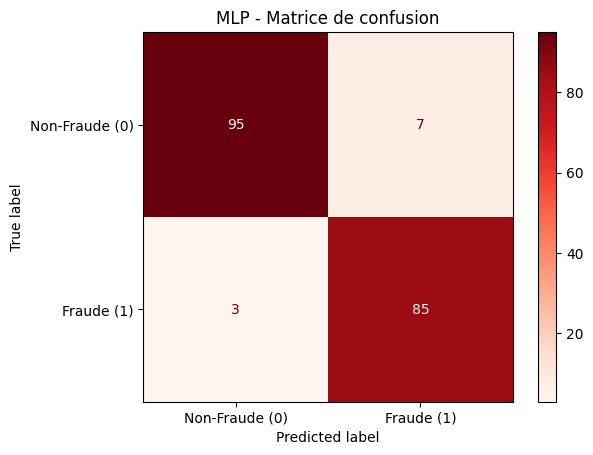

In [39]:
#  Prédictions
y_pred_mlp = mlp.predict(X_test_scaled)

#  Matrice de confusion
mlp_matrix = confusion_matrix(y_test, y_pred_mlp)

#  Affichage matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=mlp_matrix,
                              display_labels=['Non-Fraude (0)', 'Fraude (1)'])
disp.plot(cmap=plt.cm.Reds)
plt.title("MLP - Matrice de confusion")
plt.savefig('mlp_cm_plot.png')
plt.show()